# Data Science Jobs Exploration

The purpose of this project is to assist students to better understand of data science job markets and to plan job hunting accordingly. It will look at the following aspects for the data:

* How many data related jobs are available? How is the amount compared to Software Engineer jobs?
* What are the geographical distributions?
* What are degree requirements? Masters or phd preferred, computer science/ mathematics/ statistics majors preferred?
* Years of experiences needed?
* What are the key job skills needed? 
* What are the skillsets baskets related to different titles? 

The first 5 questions will be analyzed quite intuitively and followed by visualization. The last question will be explored using LDA clustering or association rules. 

First let's look at some initial data we have. 

In [74]:
import pandas as pd

dataJobs = pd.read_csv("dataJobs.csv");
dataJobs["date"] = pd.to_datetime(dataJobs["date"] )
seJobs = pd.read_csv("SEJobs.csv")
seJobs["date"] = pd.to_datetime(seJobs["date"] )
print dataJobs.dtypes

Unnamed: 0                        int64
city                             object
company                          object
country                          object
date                     datetime64[ns]
expired                            bool
formattedLocation                object
formattedLocationFull            object
formattedRelativeTime            object
indeedApply                        bool
jobkey                           object
jobtitle                         object
latitude                        float64
longitude                       float64
onmousedown                      object
query                            object
snippet                          object
source                           object
sponsored                          bool
state                            object
stations                        float64
url                              object
dtype: object


## How many data related jobs are available? 

In [21]:
import urllib2
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

def requesturl(query, startNo):
    query = "\"" + query + "\""
    url = "http://api.indeed.com/ads/apisearch?publisher=9207766499679789&v=2&q="+query +"&l=&sort=&radius=&st=&jt=fulltime&start="+str(startNo)
    url += "&limit=26&fromage=365&highlight=0&filter=&latlong=1&co=us&chnl=&userip=45.56.94.21&useragent=&v=2"
    return url

#request & return the xml file
def indeedrequest(query, startNo):
    url = requesturl(query, startNo)
    response = urllib2.urlopen(url)
    content = response.read()
    return(content)

def getTotal(query):
    content = indeedrequest(query, 0)
    root = ET.fromstring(content)
    return int(root.find('totalresults').text)


In [71]:
data = ["data+scientist", "data+engineer","data+analyst", "business+analyst","marketing+analyst", "machine+learning"]
jobsNo = dict()
for i in data:
    jobsNo[i] = getTotal(i)
se = "software+engineer"
jobsNo[se] = getTotal(se)

print jobsNo

{'data+scientist': 2540, 'machine+learning': 8130, 'business+analyst': 11042, 'data+engineer': 1346, 'data+analyst': 4350, 'software+engineer': 21237, 'marketing+analyst': 809}


Summed from our findings:

* Data scientists jobs are only 1/10 of software engineer jobs.
* Data engineer jobs are 1/20 of software engineer jobs.
* Business analysts jobs are most popular amongst all the data jobs.

Now we will also look at the job updates pattern for SE jobs and DS jobs. Because of API limitation, we are only able to obtain the most recent 4 months data.

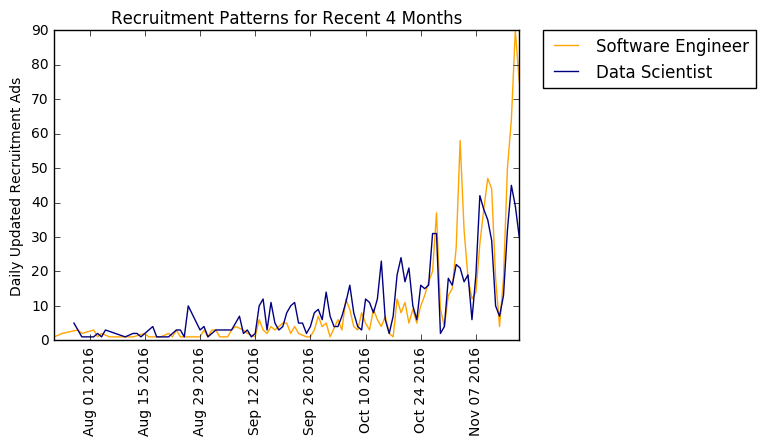

In [137]:
from collections import Counter

dataJobs = dataJobs[dataJobs["date"] >= seJobs["date"].min()] #make dates equal

dsUpdatedDates = Counter([i.date() for i in dataJobs[dataJobs["query"] == "data+scientist"]["date"]])
seUpdatedDates = Counter([i.date() for i in seJobs["date"]])
sortedDatesSE = sorted(seUpdatedDates.keys())
sortedDatesDS = sorted(dsUpdatedDates.keys())


locs, labels = plt.xticks(); 
plt.setp(labels, rotation=90); #rotate x axis strings to increase readability
plt.plot(sortedDatesSE , [seUpdatedDates[i] for i in sortedDatesSE], color = "orange", label = "Software Engineer")
plt.plot(sortedDatesDS , [dsUpdatedDates[i] for i in sortedDatesDS], color = "navy", label = "Data Scientist")
plt.ylabel('Daily Updated Recruitment Ads') ; plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.); #labels and legend
plt.title('Recruitment Patterns for Recent 4 Months' )
plt.show()

The demands for data scientists talents are steady. However, in peak seasons, the demands for SE soar. The data scientist jobs therefore can't compare.